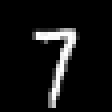

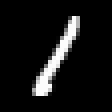

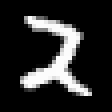

3-element Array{UInt8,1}:
 0x07
 0x01
 0x02

┌ Info: Loading MNIST...
└ @ Main /kuacc/users/dyuret/.julia/dev/Knet/data/mnist.jl:33


In [1]:
# Take a look at some random images and labels in data
using Pkg; for p in ("Knet","Images"); haskey(Pkg.installed(),p) || Pkg.add(p); end
using Knet,Images,Random
include(Knet.dir("data","mnist.jl"))
xtrn,ytrn,xtst,ytst = mnist()
rp = randperm(10000)
for i=1:3; display(mnistview(xtst,rp[i])); end
display(ytst[rp[1:3]])

In [2]:
include("mlp.jl")

Main.MLP

In [3]:
@doc MLP

This example learns to classify hand-written digits from the [MNIST](http://yann.lecun.com/exdb/mnist) dataset.  There are 60000 training and 10000 test examples. Each input x consists of 784 pixels representing a 28x28 image.  The pixel values are normalized to [0,1]. Each output y is converted to a ten-dimensional one-hot vector (a vector that has a single non-zero component) indicating the correct class (0-9) for a given image.  10 is used to represent 0.

You can run the demo using `julia mlp.jl` on the command line or `julia> MLP.main()` at the Julia prompt.  Options can be used like `julia mlp.jl --epochs 3` or `julia> MLP.main("--epochs 3")`.  Use `julia mlp.jl --help` for a list of options.  The dataset will be automatically downloaded.  By default a softmax model will be trained for 10 epochs.  You can also train a multi-layer perceptron by specifying one or more –hidden sizes.  The accuracy for the training and test sets will be printed at every epoch and optimized parameters will be returned.


In [4]:
MLP.main("--help")

usage: <PROGRAM> [--seed SEED] [--batchsize BATCHSIZE]
                 [--epochs EPOCHS] [--hidden [HIDDEN...]] [--lr LR]
                 [--winit WINIT] [--fast] [--atype ATYPE]
                 [--gcheck GCHECK]

mlp.jl (c) Deniz Yuret, 2016. Multi-layer perceptron model on the
MNIST handwritten digit recognition problem from
http://yann.lecun.com/exdb/mnist.

optional arguments:
  --seed SEED           random number seed: use a nonnegative int for
                        repeatable results (type: Int64, default: -1)
  --batchsize BATCHSIZE
                        minibatch size (type: Int64, default: 100)
  --epochs EPOCHS       number of epochs for training (type: Int64,
                        default: 10)
  --hidden [HIDDEN...]  sizes of hidden layers, e.g. --hidden 128 64
                        for a net with two hidden layers (type: Int64)
  --lr LR               learning rate (type: Float64, default: 0.5)
  --winit WINIT         w initialized with winit*randn() (type:
     

In [5]:
model = MLP.main("");

mlp.jl (c) Deniz Yuret, 2016. Multi-layer perceptron model on the MNIST handwritten digit recognition problem from http://yann.lecun.com/exdb/mnist.
opts=(:batchsize, 100)(:fast, false)(:atype, "KnetArray{Float32}")(:epochs, 10)(:gcheck, 0)(:winit, 0.1)(:lr, 0.5)(:hidden, Int64[])(:seed, -1)


┌ Info: Loading MNIST...
└ @ Main.MLP /kuacc/users/dyuret/.julia/dev/Knet/data/mnist.jl:33


(:epoch, 0, :trn, 0.08668333333333333, :tst, 0.0859)
(:epoch, 1, :trn, 0.9001, :tst, 0.9044)
(:epoch, 2, :trn, 0.9077666666666667, :tst, 0.9078)
(:epoch, 3, :trn, 0.9113333333333333, :tst, 0.91)
(:epoch, 4, :trn, 0.9138333333333334, :tst, 0.9116)
(:epoch, 5, :trn, 0.9152166666666667, :tst, 0.9129)
(:epoch, 6, :trn, 0.9165, :tst, 0.914)
(:epoch, 7, :trn, 0.9175333333333333, :tst, 0.9149)
(:epoch, 8, :trn, 0.9185, :tst, 0.915)
(:epoch, 9, :trn, 0.9189666666666667, :tst, 0.9159)
(:epoch, 10, :trn, 0.9193833333333333, :tst, 0.9164)
  7.748784 seconds (8.38 M allocations: 4.267 GiB, 4.67% gc time)
